## Homework 3 - Juan Sidrach de Cardona Mora (A53096298)

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [1]:
%pylab inline
data_dir = "./Data/Weather"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [180]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: mas-dse-open.s3.amazonaws.com


### Get the statistics from the Pickle File

In [2]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [3]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [4]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [5]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas './Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


### Script for plotting yearly plots 

In [10]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-', color=c);
    else:
        plot_date(yearday,T, '-');
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

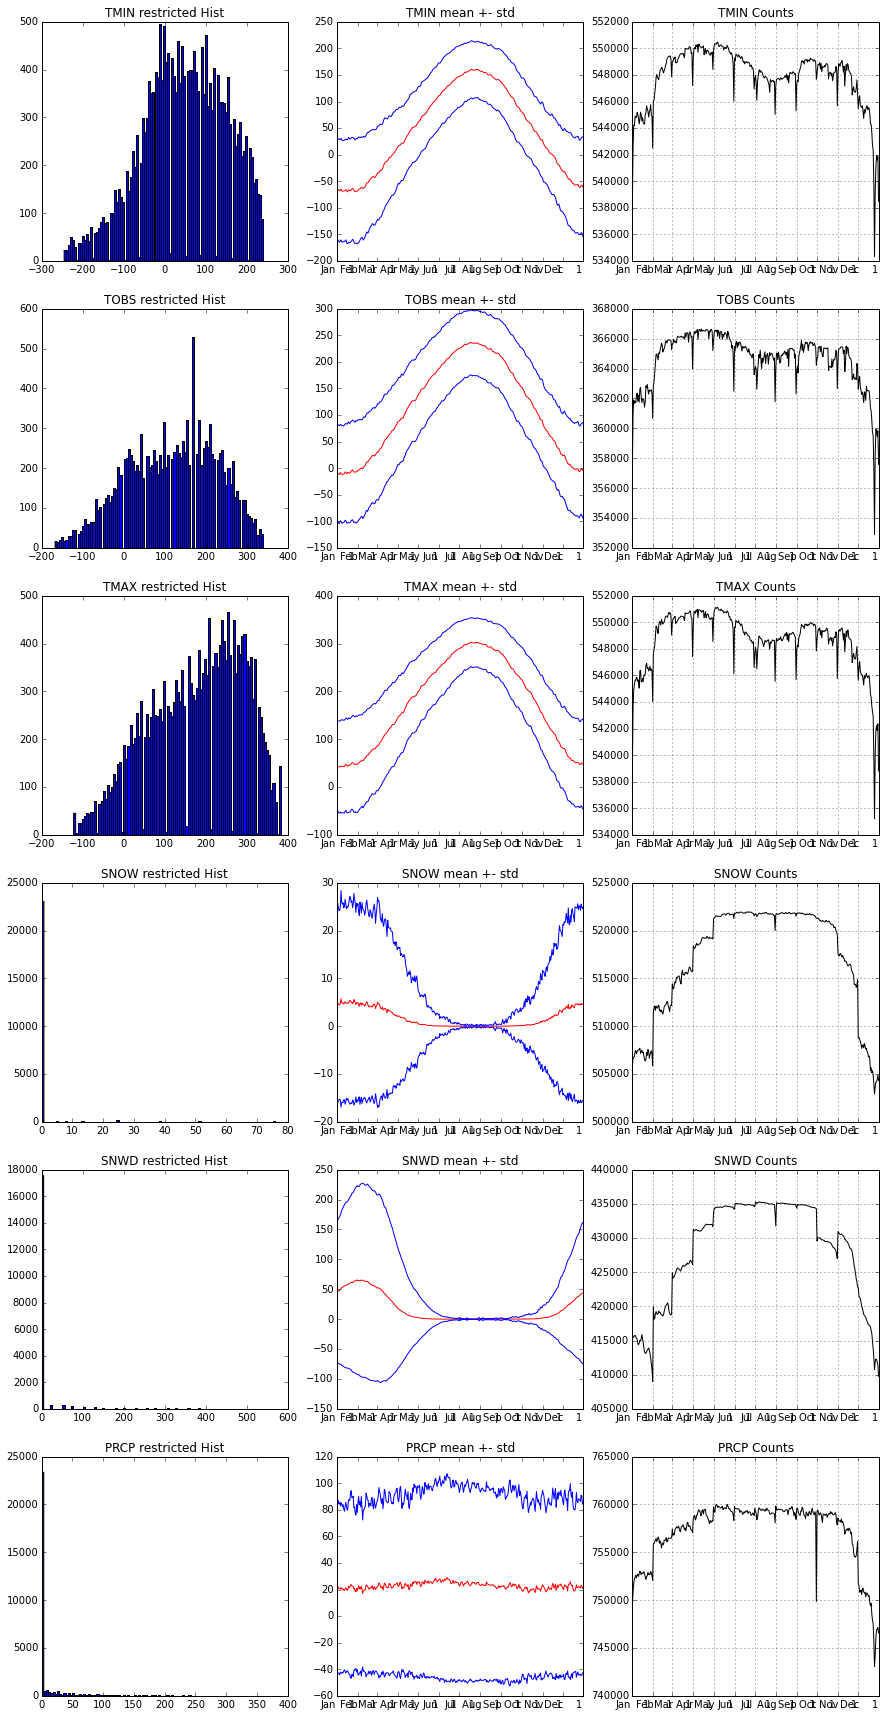

In [16]:
figure(figsize=(15,30))
offset=1

for meas in STAT.keys():
    ## Your code for Histogram
    subplot(6,3,offset)
    offset+=1
    data_hist = filter(lambda x: x >= STAT[meas]['low100'] and x <= STAT[meas]['high100'],
                       STAT[meas]['SortedVals'])
    hist(data_hist, bins=100)
    title(meas + ' restricted Hist')

    ## Your code for mean and mean +- std    
    subplot(6,3,offset)
    offset+=1

    data_mean = STAT[meas]['Mean']
    data_std = sqrt(STAT[meas]['Var'])
    YearlyPlots(data_mean, ttl = meas + ' mean +- std', c='red')
    YearlyPlots(transpose([data_mean - data_std, data_mean + data_std]), ttl = meas + ' mean +- std', c='blue')

    ## Your code for number of measurements    
    subplot(6,3,offset)
    offset+=1

    YearlyPlots(STAT[meas]['NE'], ttl = meas + ' Counts', c = 'black')

### Plot the Number of measurements recorded each day for TMAX

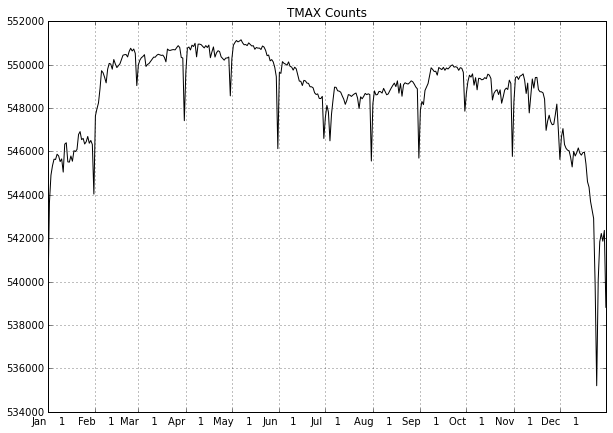

In [17]:
## Your code here
YearlyPlots(STAT['TMAX']['NE'], ttl = 'TMAX Counts', c = 'black')

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


### Question 1
- I can think of two reason for the lower counts. For the ones at the end of each month, it could be that about 5-10% of the stations require regular maintenance to work properly. Thus at the end of the month they do not measure anything at all while the maintenance is going on. Regarding the sudden dip at the end of the year, I think this is a more common effect, and more stations are affected by this (since the drop is higher). It could be that some stations stop working, and the maintenance crew is on holiday (it more or less matches that period).
- I think it is restricted to a subset of stations, since the drop in the number of counts is not that significant (from 550k to 545k, for example). That makes me think that most of the station can work uninterrupted, while some small percentage need monthly maintenance.
- I would discard the data (the affected days) from the stations that require maintenance every month. One way to do it is set a minimum number of measurements per day per station, and do not consider the station data for each day if the number of measurements is not high enough. If the subset of affected stations is a very specific one, with similar characteristics, removing their data would have a bigger impact on the overall information. For instance, if all stations in the north pole suffer from this, and we remove their data one day each month, the average temp. is going to be higher than the actual one. One idea could be to fill those days of the month with the average between the previous day and next day, as usually this kind of measurements are continuoum in time and changes tend to be progressive. Additionally, we could see visually how the 'fill' works, setting some threshold and averaging the count between previous and next day (as an example of averaging when the data is not present):

### Instructor Feedback

Nice analysis and a nice attempt at fixing the problem. You Hypothesize that a small number of stations are involved, but you did not confirm that directly (by removing such stations) or try to see what is common to these stations.

Extra Credit points: 20

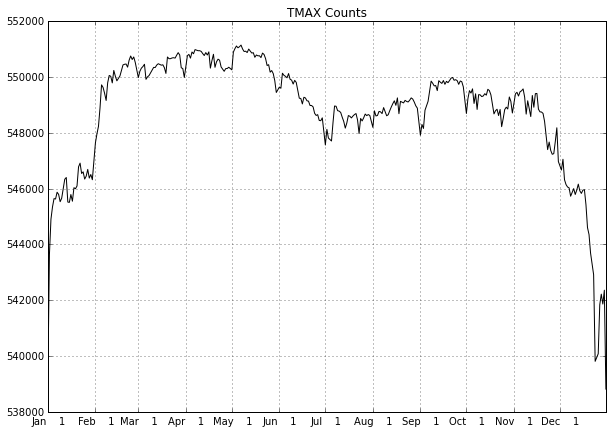

In [18]:
ExtraCounts = list(STAT['TMAX']['NE'])
threshold = 0.999
for i in xrange(1, len(ExtraCounts) - 1):
    curr = ExtraCounts[i]
    prev = ExtraCounts[i-1]
    nex = ExtraCounts[i+1]
    avg = (prev + nex) / 2
    if      ExtraCounts[i] < prev \
        and ExtraCounts[i] < nex  \
        and curr < threshold * avg:
            ExtraCounts[i] = avg

YearlyPlots(ExtraCounts, 'TMAX Counts', c = 'black')

### Question 2
- I think the counts per day on SNWD suffer from a similar situation than the temperature ones. The counts go up significantly at the end of the month. This could be due to scheduled maintenances, as explained with the temperatures. In this cases, the maintenances would allow more counts as some fixes are deployed (as removing something that may obstruct the probes).
- The second issue is that the number of measurements goes down in the winter. This could be due to some areas being inaccessible (too much snow), and when one station stops sending data they cannot fix it until the weather conditions improve. See next graph:

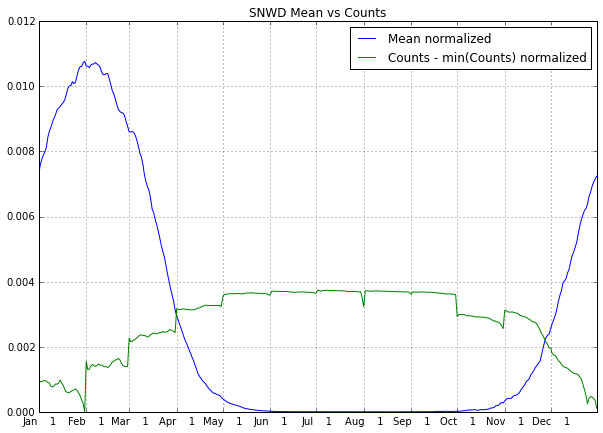

In [19]:
SNWD_sum = np.sum(STAT['SNWD']['Mean'])
SNWD_P = map(lambda x: x / SNWD_sum, STAT['SNWD']['Mean'])
SNWD_NE_change = STAT['SNWD']['NE'] - min(STAT['SNWD']['NE'])
SNWD_sumNE = np.sum(SNWD_NE_change)
SNWD_PNE = map(lambda x: x / SNWD_sumNE, SNWD_NE_change)
YearlyPlots(transpose([SNWD_P, SNWD_PNE]), 'SNWD Mean vs Counts')
legend(['Mean normalized','Counts - min(Counts) normalized'])

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

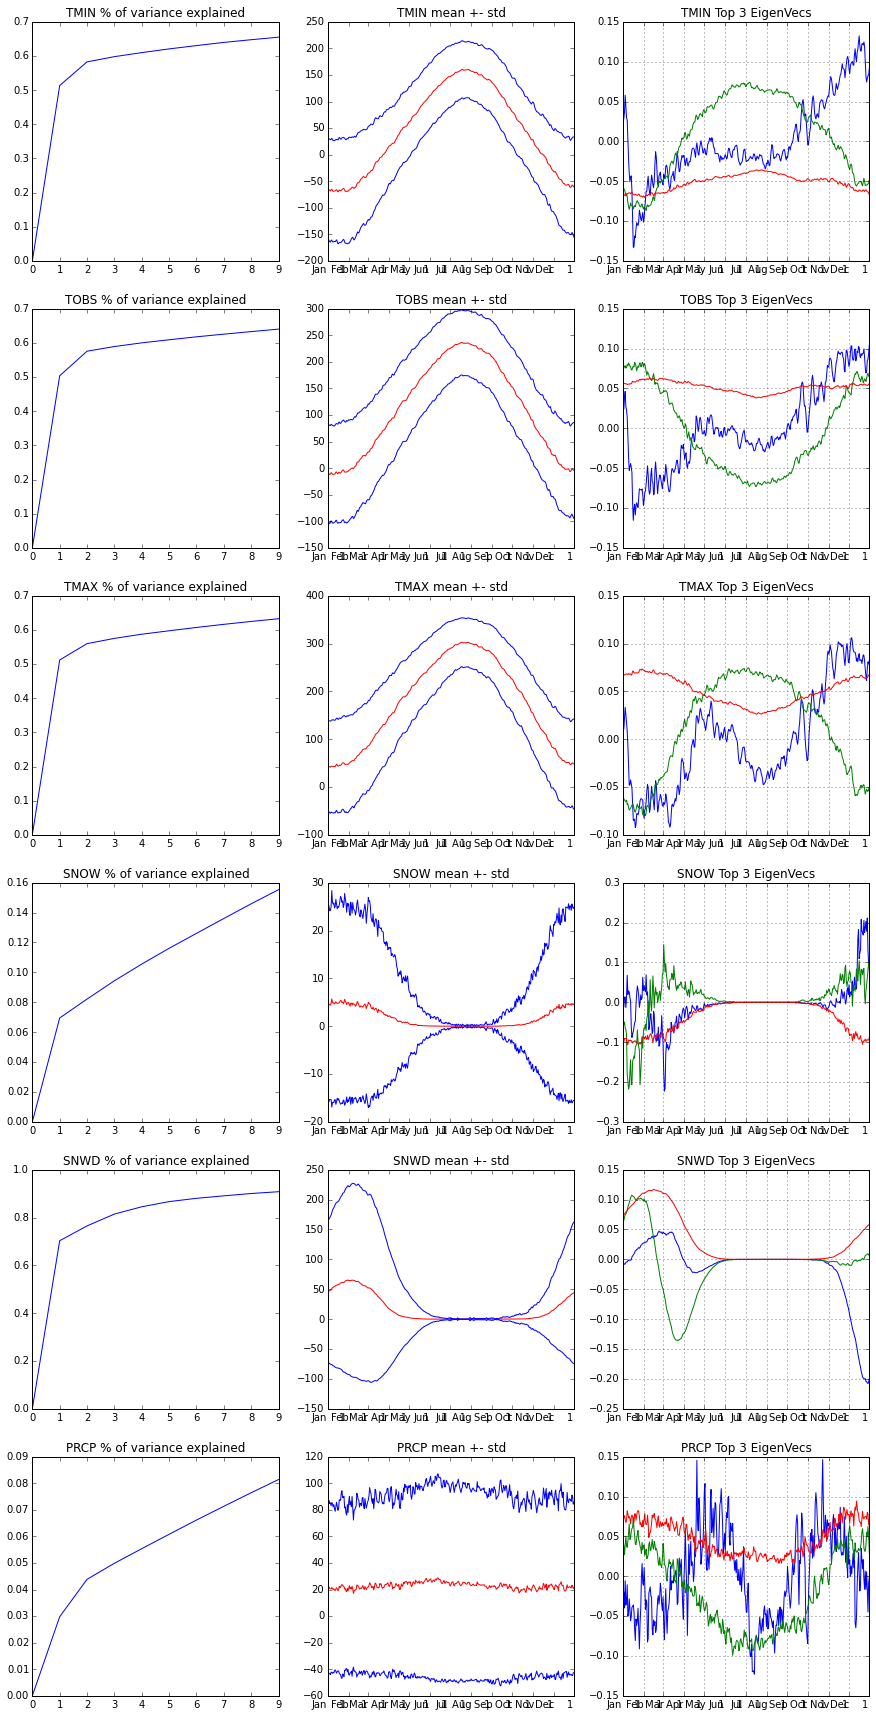

In [24]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    ## Your code for percentage of variance explained
    subplot(6,3,offset)
    offset+=1

    numEigvals = 9
    eigval = STAT[meas]['eigval']
    plot(([0,] + list(cumsum(eigval[:numEigvals])/sum(eigval))))
    title(meas + ' % of variance explained')

    ## Your code for mean and mean +- std
    subplot(6,3,offset).set_color_cycle(['red', 'blue', 'blue'])
    offset+=1

    data_mean = STAT[meas]['Mean']
    data_std = sqrt(STAT[meas]['Var'])
    YearlyPlots(data_mean, ttl = meas + ' mean +- std', c = 'red')
    YearlyPlots(transpose([data_mean - data_std, data_mean + data_std]), ttl = meas + ' mean +- std', c = 'blue')

    subplot(6,3,offset)
    offset+=1

    ## Your code for top-3 eigenvectors
    YearlyPlots(STAT[meas]['eigvec'][:,2], ttl = meas + ' Top 3 EigenVecs')
    YearlyPlots(STAT[meas]['eigvec'][:,1], ttl = meas + ' Top 3 EigenVecs')
    YearlyPlots(STAT[meas]['eigvec'][:,0], ttl = meas + ' Top 3 EigenVecs')